In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [80]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [55]:
data.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [14]:
data.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


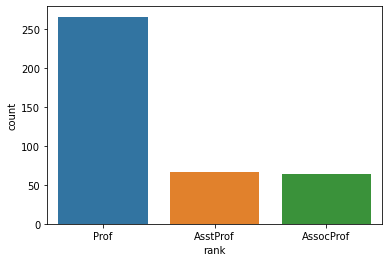

In [36]:
ax= sns.countplot(x='rank',data = data)
print(data['rank'].value_counts())

In [43]:
# encoding of data frame

from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()


In [68]:
# making dataframe for the nominal data
df_nom = data[['sex']].copy()
df_nom.columns

Index(['sex'], dtype='object')

Male      358
Female     39
Name: sex, dtype: int64


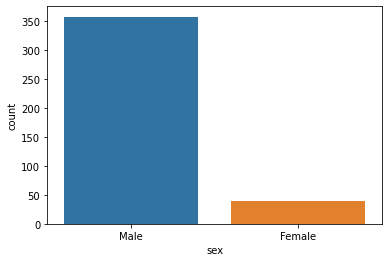

In [69]:
ax= sns.countplot(x='sex',data = df_nom)
print(df_nom['sex'].value_counts())

In [72]:
# making dataframe for the ordinal data
df_ord = data[["rank","discipline"]].copy()
df_ord.columns

Index(['rank', 'discipline'], dtype='object')

In [75]:
# encoding of data frame
from sklearn.preprocessing import OrdinalEncoder
enc= OrdinalEncoder()

In [92]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [93]:
data

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [94]:
data.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

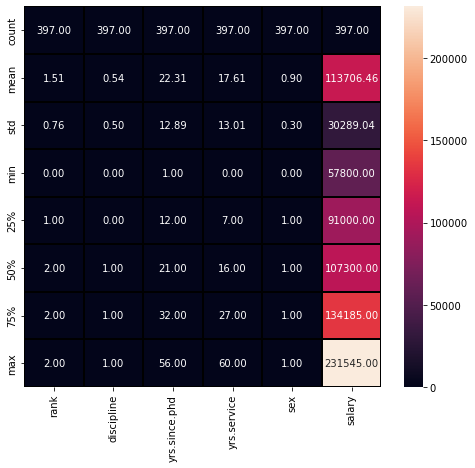

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
sns.heatmap(data.describe(),annot= True,linewidth=0.1,linecolor='black',fmt="0.2f")

In [96]:
data.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

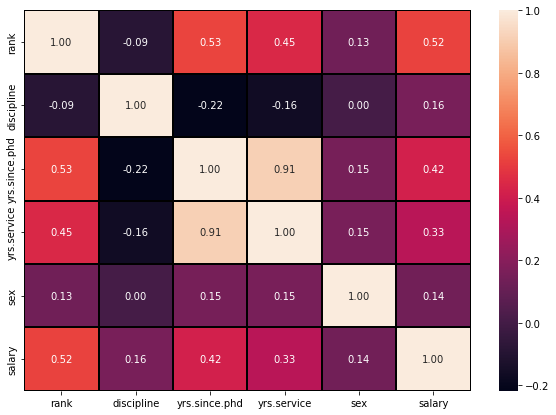

In [97]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot= True,linewidth=0.1,linecolor='black',fmt="0.2f")

In [98]:
data.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [99]:
# some columns are not in the range (+-0.65)
# but they all are categorical data , so we cant applied here skewness removal

In [100]:
data.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

In [101]:
# checking outliers which are not categorical columns


<AxesSubplot:>

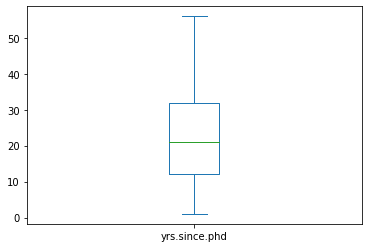

In [102]:
data["yrs.since.phd"].plot.box()

<AxesSubplot:>

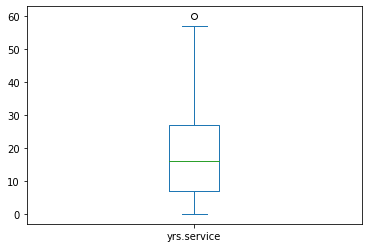

In [103]:
data["yrs.service"].plot.box()

In [117]:
data.shape

(397, 6)

In [122]:
from scipy.stats import zscore
z= np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [123]:
data_z = data[(z<3).all(axis=1)]
data_z

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [ ]:
data_loss =((397-354)/397)*100

In [124]:
data_loss

10.831234256926953

In [216]:
# seprating the columns into features and target
x= data.drop("salary",axis=1)
y= data["salary"]

In [126]:
# scaling the data

In [127]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [175]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print("At random state",i , "the training accuracy is",  {r2_score(y_train,pred_train)})
    
    print("At random state",i , "the testing accuracy is" , {r2_score(y_test,pred_test)})
    print("\n")

At random state 0 the training accuracy is {0.3611999954853077}
At random state 0 the testing accuracy is {0.4079258314975236}


At random state 1 the training accuracy is {0.3604245854198438}
At random state 1 the testing accuracy is {0.41633641876629457}


At random state 2 the training accuracy is {0.37547390964955596}
At random state 2 the testing accuracy is {0.3600189554526694}


At random state 3 the training accuracy is {0.3847313825130595}
At random state 3 the testing accuracy is {0.3293529875010861}


At random state 4 the training accuracy is {0.38517450334380465}
At random state 4 the testing accuracy is {0.304400813331562}


At random state 5 the training accuracy is {0.3950033630150771}
At random state 5 the testing accuracy is {0.2752907752774737}


At random state 6 the training accuracy is {0.3650308031752799}
At random state 6 the testing accuracy is {0.40189870806075667}


At random state 7 the training accuracy is {0.3575963886324032}
At random state 7 the testing 

In [176]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=52)
 

In [177]:
lr.fit(x_train,y_train)

LinearRegression()

In [178]:
pred_test = lr.predict(x_test)

In [179]:
print(r2_score(y_test,pred_test))

0.3682296312128154


In [180]:
#so we use lr model

In [181]:
#cross validation

In [186]:
Train_accuracy = r2_score(y_train,pred_train)


In [187]:
Test_accuracy = r2_score(y_test,pred_test)

In [174]:
from sklearn.model_selection import cross_val_score

In [189]:
for j in range(3,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print("At cross fold",j, "the cv score is",cv_mean,"and accuracy score for training is",Train_accuracy,"and accuracy score for testing is", Test_accuracy)
    print("\n")    
    

At cross fold 3 the cv score is 0.32033286730598787 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 4 the cv score is 0.3218196693768359 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 5 the cv score is 0.29569928663871775 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 6 the cv score is 0.33096341839295546 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 7 the cv score is 0.3257704419996536 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 8 the cv score is 0.3310060584513582 and accuracy score for training is -0.39755881262412696 and accuracy score for testing is 0.3682296312128154


At cross fold 9 the cv sc

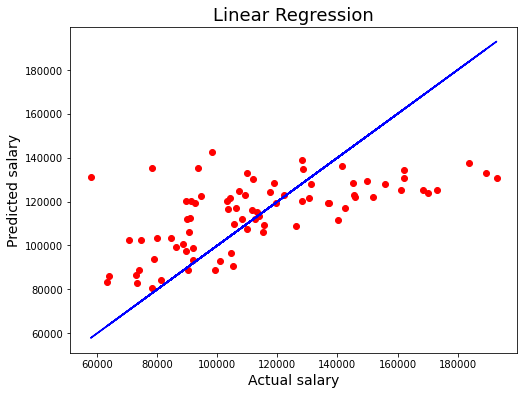

In [191]:
plt.figure(figsize = (8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color = 'b')
plt.xlabel('Actual salary',fontsize=14)
plt.ylabel('Predicted salary',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [193]:
from sklearn.model_selection import GridSearchCV

In [200]:
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(2,10))}

ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)



{'alpha': 10, 'random_state': 2}


In [201]:
ls = Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)



In [202]:
lss = r2_score(y_test,pred_ls)
lss

0.36772084379567005

In [203]:
cv_score = cross_val_score(ls,x,y,cv=7)
cv_mean = cv_score.mean()
cv_mean

0.32573991850082235

In [204]:
# ensemble techniques

In [206]:
from sklearn.ensemble import RandomForestRegressor


In [208]:
parameter = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rf = RandomForestRegressor()
clf = GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)



{'criterion': 'mae', 'max_features': 'sqrt'}


In [209]:
rf = RandomForestRegressor(criterion="mae",max_features="sqrt")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_dec = rf.predict(x_test)



In [210]:
rfs = r2_score(y_test,pred_dec)
print('R2 Score:',rfs*100)
rf_score = cross_val_score(rf,x,y,cv=7)
rfc = rf_score.mean()
print("Cross val Score :",rfc*100)

R2 Score: 37.075330689762076
Cross val Score : 33.48967688784947


In [211]:
import pickle
filename = "salary.pkl"
pickle.dump(rf,open(filename,"wb"))